**K-Means Clustering Untuk Sistem Rekomendasi Kucing**

In [1]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#baca dataset
file_path = r"E:\KucingKu Web\dataset\Dataset KucingKu Web.xlsx"
df = pd.read_excel(file_path, sheet_name="Dataset")
df = pd.DataFrame(df)
df       

,Nama,Jenis Kelamin,Umur,Warna,Lokasi,Status Vaksinasi,Foto Kucing,Asal data
0,Hachi,Jantan,8 bulan,Hitam,Sidoarjo,Sudah,Hachi.jpg,DARI IG ADOPSI SURABAYA
1,Bedok,Betina,4 bulan,Coklat,Surabaya,Belum,Bedok.jpg,NaN
2,Januari,Jantan,2 bulan,Coklat,Surabaya,Belum,Januari.jpg,NaN
3,Iwak,Jantan,3 bulan,Abu-Abu,Surabaya,Belum,Iwak.jpg,NaN
4,Moza,Betina,2 tahun,Abu-Abu,Surabaya,Belum,Moza.jpg,NaN
...,...,...,...,...,...,...,...,...
95,Bejo,Jantan,3 tahun,Hitam,Jakarta,Sudah,Bejo.jpg,NaN
96,Maisy,Betina,2 tahun,Abu-Abu,Jakarta,Sudah,maisy.jpg,NaN
97,Snow,Betina,1 tahun,Putih,Jakarta,Sudah,Snow.jpg,NaN
98,Keddy,Jantan,1 tahun,Abu-Abu,Malang,Belum,Keddy.jpeg,NaN


In [3]:
#fungsi untuk mengelompokkan umur kucing
def kategori_umur(umur):
    if 'tahun' in umur:
        tahun = int(umur.split()[0])
        if tahun < 1:
            return "Baby"
        elif tahun < 2:
            return "Young"
        else:
            return "Adult"
    elif 'bulan' in umur:
        bulan = int(umur.split()[0])
        if bulan < 6:
            return "Baby"
        elif bulan < 12:
            return "Young"
        else:
            return "Adult"

In [4]:
#fungsi untuk mengelompokkan kategori lokasi
def kategori_lokasi(lokasi):
    if lokasi == 'Surabaya' or lokasi == 'Jakarta' or lokasi == 'Sidoarjo':
        return lokasi
    else:
        return 'Kota Lainnya'

In [5]:
df['Umur'] = df['Umur'].apply(kategori_umur)
df['Lokasi'] = df['Lokasi'].apply(kategori_lokasi)
df = df.drop(columns=['Asal data','Foto Kucing'])
df

,Nama,Jenis Kelamin,Umur,Warna,Lokasi,Status Vaksinasi
0,Hachi,Jantan,Young,Hitam,Sidoarjo,Sudah
1,Bedok,Betina,Baby,Coklat,Surabaya,Belum
2,Januari,Jantan,Baby,Coklat,Surabaya,Belum
3,Iwak,Jantan,Baby,Abu-Abu,Surabaya,Belum
4,Moza,Betina,Adult,Abu-Abu,Surabaya,Belum
...,...,...,...,...,...,...
95,Bejo,Jantan,Adult,Hitam,Jakarta,Sudah
96,Maisy,Betina,Adult,Abu-Abu,Jakarta,Sudah
97,Snow,Betina,Young,Putih,Jakarta,Sudah
98,Keddy,Jantan,Young,Abu-Abu,Kota Lainnya,Belum


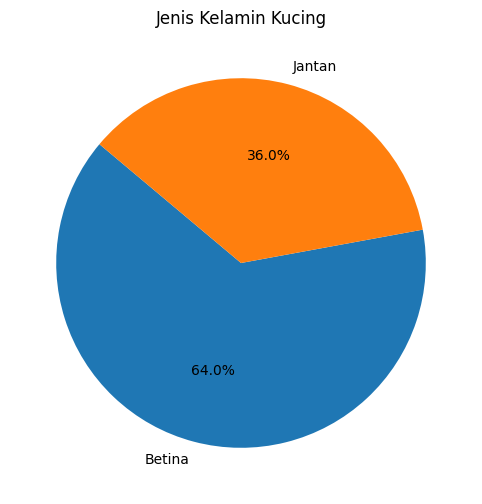

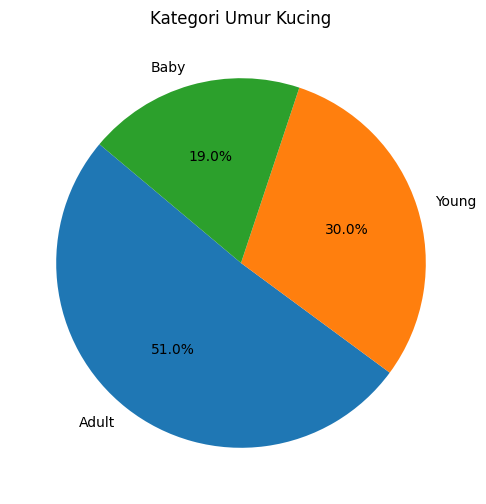

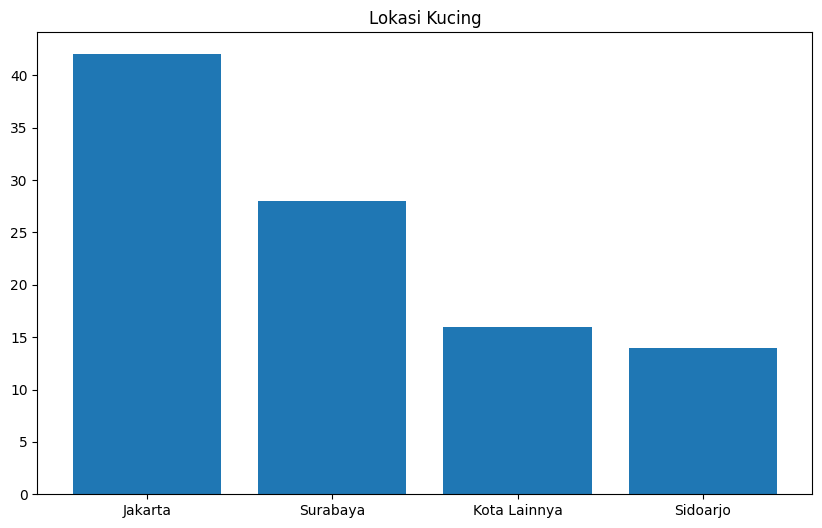

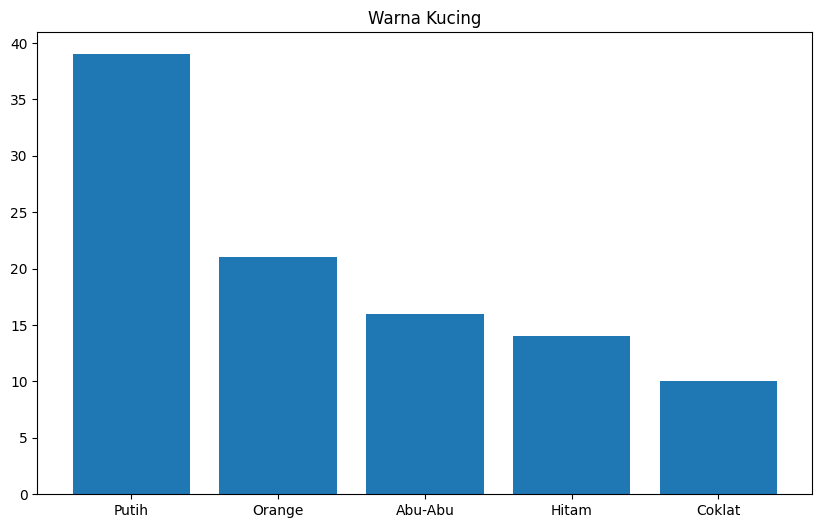

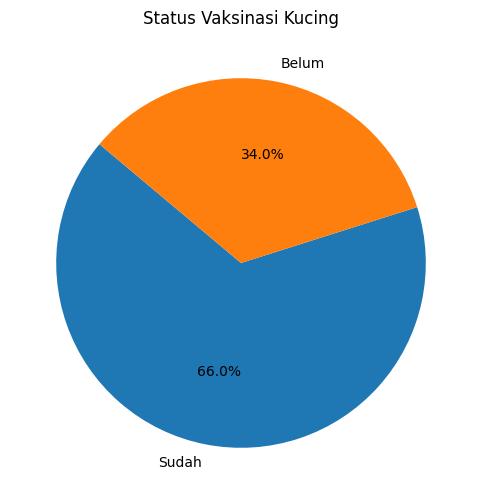

In [6]:
# Visualisasi Jenis kelamin
jenis_kelamin = df['Jenis Kelamin'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(jenis_kelamin, labels=jenis_kelamin.index, autopct='%1.1f%%', startangle=140)
plt.title('Jenis Kelamin Kucing')
plt.show()

# Visualisasi Kategori Umur
umur = df['Umur'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(umur, labels=umur.index, autopct='%1.1f%%', startangle=140)
plt.title('Kategori Umur Kucing')
plt.show()

#Visualisasi Lokasi 
lokasi = df['Lokasi'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(lokasi.index, lokasi)
plt.title('Lokasi Kucing')
plt.show()

#Visualisasi Warna
warna = df['Warna'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(warna.index, warna)
plt.title('Warna Kucing')
plt.show()

#Visualisasi Status Vaksin
vaksinasi = df['Status Vaksinasi'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(vaksinasi, labels=vaksinasi.index, autopct='%1.1f%%', startangle=140)
plt.title('Status Vaksinasi Kucing')
plt.show()

In [7]:
features = ['Jenis Kelamin', 'Umur','Warna', 'Status Vaksinasi']
X = df[features]
X = pd.get_dummies(X) #one hot encoding

In [8]:
#normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
#mencari jumlah cluster terbaik
inertia = []
silhouette = []
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))
    #print setiap jumlah inertia dan silhouette
    print(f'Untuk Jumlah Cluster: {i}, Inertia: {kmeans.inertia_}, Silhouette: {silhouette_score(X_pca, kmeans.labels_)}')

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 2, Inertia: 267.5457693426246, Silhouette: 0.4085621313609149
Untuk Jumlah Cluster: 3, Inertia: 143.02569633834534, Silhouette: 0.470907143359358
Untuk Jumlah Cluster: 4, Inertia: 96.30639286090504, Silhouette: 0.47540395757084886
Untuk Jumlah Cluster: 5, Inertia: 77.12195830219537, Silhouette: 0.482547289534021
Untuk Jumlah Cluster: 6, Inertia: 61.51853713678458, Silhouette: 0.47327623346147624
Untuk Jumlah Cluster: 7, Inertia: 54.177795872993116, Silhouette: 0.4616612477730577
Untuk Jumlah Cluster: 8, Inertia: 44.6930509372737, Silhouette: 0.5139740169707853
Untuk Jumlah Cluster: 9, Inertia: 37.01571344483985, Silhouette: 0.5345766531706445


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 10, Inertia: 31.598456740798756, Silhouette: 0.5399054814699963
Untuk Jumlah Cluster: 11, Inertia: 25.52987955571952, Silhouette: 0.6052653433830606
Untuk Jumlah Cluster: 12, Inertia: 21.780478241555667, Silhouette: 0.6060153002852412
Untuk Jumlah Cluster: 13, Inertia: 18.002428878835154, Silhouette: 0.6222347352841746
Untuk Jumlah Cluster: 14, Inertia: 16.277731154550686, Silhouette: 0.6470995970995808
Untuk Jumlah Cluster: 15, Inertia: 14.05950751386776, Silhouette: 0.6486408648195581
Untuk Jumlah Cluster: 16, Inertia: 11.617676668451914, Silhouette: 0.6652946348822951


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 17, Inertia: 9.125832937113026, Silhouette: 0.6844524843484069
Untuk Jumlah Cluster: 18, Inertia: 7.618048802934167, Silhouette: 0.7264255380536605
Untuk Jumlah Cluster: 19, Inertia: 6.278149007344484, Silhouette: 0.745028978957737
Untuk Jumlah Cluster: 20, Inertia: 5.097134882263064, Silhouette: 0.7721099128110808
Untuk Jumlah Cluster: 21, Inertia: 4.417974660695378, Silhouette: 0.7897503548324646
Untuk Jumlah Cluster: 22, Inertia: 3.392978775970256, Silhouette: 0.8083890128169321


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 23, Inertia: 2.6911753609151003, Silhouette: 0.8251152241769867
Untuk Jumlah Cluster: 24, Inertia: 2.1326226361196374, Silhouette: 0.8254475176653302
Untuk Jumlah Cluster: 25, Inertia: 1.7878409862992835, Silhouette: 0.847705172462681
Untuk Jumlah Cluster: 26, Inertia: 1.560791457771196, Silhouette: 0.8592557067236877
Untuk Jumlah Cluster: 27, Inertia: 1.3539224678789834, Silhouette: 0.8771704117829432


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 28, Inertia: 1.1470534779867712, Silhouette: 0.8910530397764299
Untuk Jumlah Cluster: 29, Inertia: 0.9486400700332283, Silhouette: 0.890544160130571
Untuk Jumlah Cluster: 30, Inertia: 0.8663940069520801, Silhouette: 0.9108123317929594
Untuk Jumlah Cluster: 31, Inertia: 0.6885736283524714, Silhouette: 0.882231665205113


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 32, Inertia: 0.528587734754905, Silhouette: 0.9063169557314614
Untuk Jumlah Cluster: 33, Inertia: 0.4045793547839378, Silhouette: 0.8951921655271668
Untuk Jumlah Cluster: 34, Inertia: 0.27034567381635466, Silhouette: 0.8981710777630905
Untuk Jumlah Cluster: 35, Inertia: 0.14105255513372167, Silhouette: 0.8980633692506212


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 36, Inertia: 0.026125338526937637, Silhouette: 0.8979556607381518
Untuk Jumlah Cluster: 37, Inertia: 1.414094802366884e-29, Silhouette: 0.8899999959257129
Untuk Jumlah Cluster: 38, Inertia: 1.32688869448503e-29, Silhouette: 0.8599999959257129


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 39, Inertia: 1.5253365159546908e-29, Silhouette: 0.8599999959257129


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


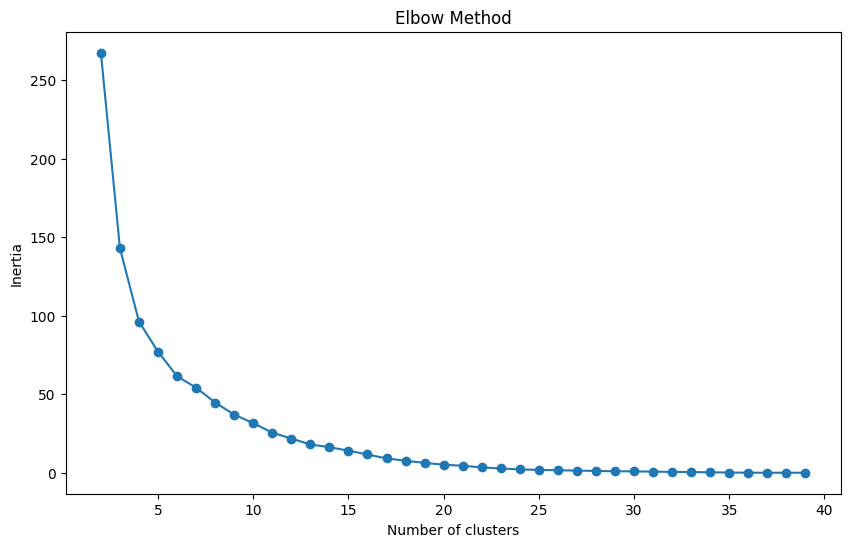

In [10]:
#visualisasi elbow method
plt.figure(figsize=(10,6))
plt.plot(range(2, 40), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

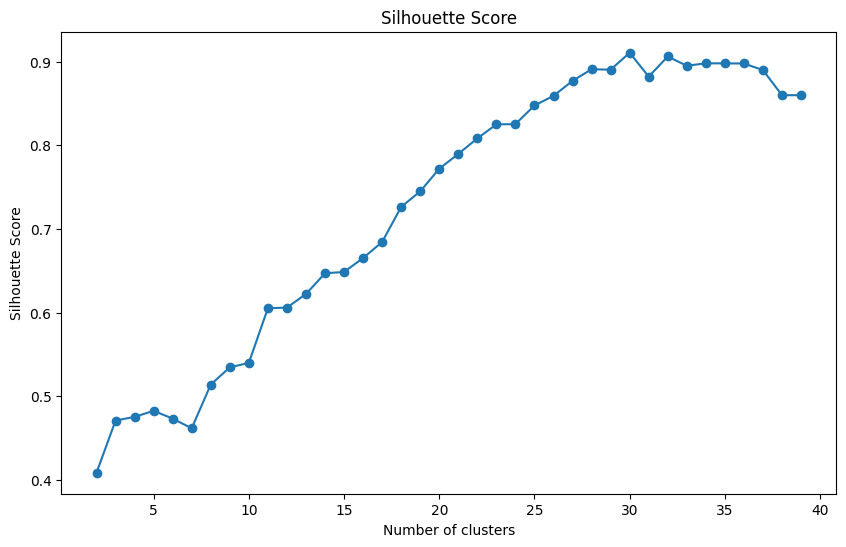

In [11]:
#tampilkan kluster terbaik
plt.figure(figsize=(10,6))
plt.plot(range(2,40), silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
best_k = max(range(2, 40), key=lambda k: silhouette[k-2]) #k-2 karena index dimulai dari 0 (jumlah minimal cluster adalah 2)
print("Nilai K terbaik adalah:", best_k)
print("Dengan skor siluet:", silhouette[best_k-2])


Nilai K terbaik adalah: 30
Dengan skor siluet: 0.9108123317929594


In [13]:
#pembagian kluster sesuai best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_pca)
df['ClusterKucing'] = kmeans.labels_
df

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Nama,Jenis Kelamin,Umur,Warna,Lokasi,Status Vaksinasi,ClusterKucing
0,Hachi,Jantan,Young,Hitam,Sidoarjo,Sudah,4
1,Bedok,Betina,Baby,Coklat,Surabaya,Belum,0
2,Januari,Jantan,Baby,Coklat,Surabaya,Belum,4
3,Iwak,Jantan,Baby,Abu-Abu,Surabaya,Belum,25
4,Moza,Betina,Adult,Abu-Abu,Surabaya,Belum,11
...,...,...,...,...,...,...,...
95,Bejo,Jantan,Adult,Hitam,Jakarta,Sudah,23
96,Maisy,Betina,Adult,Abu-Abu,Jakarta,Sudah,12
97,Snow,Betina,Young,Putih,Jakarta,Sudah,5
98,Keddy,Jantan,Young,Abu-Abu,Kota Lainnya,Belum,16


In [14]:
#simpan ke df ke csv baru
df.to_csv('hasil_cluster.csv', index=False)

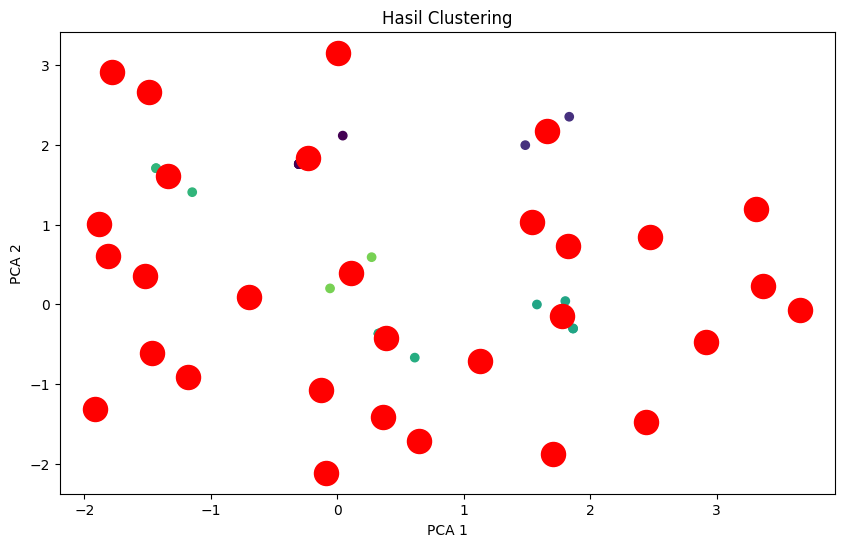

In [15]:
#visualisasi hasil clustering pakai heatmap
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Hasil Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [16]:
# # visualisasi yang memperlihatkan perbedaan antara klaster-klaster, seperti histogram fitur-fitur utama
# # misalnya, visualisasi perbedaan umur, jenis kelamin, warna, dan status vaksinasi antar klaster
# # visualisasi untuk umur
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Umur'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Umur Kucing per Cluster')
# plt.show()

# # visualisasi untuk jenis kelamin
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Jenis Kelamin'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Jenis Kelamin Kucing per Cluster')
# plt.show()

# # visualisasi untuk warna
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Warna'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Warna Kucing per Cluster')
# plt.show()

# # visualisasi untuk status vaksinasi
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Status Vaksinasi'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Status Vaksinasi Kucing per Cluster')
# plt.show()

In [17]:
#freeze model
import joblib
joblib.dump(kmeans, 'model_kucing.pkl')
joblib.dump(scaler, 'scaler_kucing.pkl')
joblib.dump(pca, 'pca_kucing.pkl')

['pca_kucing.pkl']